In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Countries Dataset.csv')

In [3]:
df

,Countries,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
0,Belgium,508,7.6,90.33,53,94,10,22,25,28,6,61,2400,6.2,3.48,26
1,Bulgaria,448,5.4,79.56,13,85,3,6,10,15,3,29,52,4.2,0.85,11
2,Czechia,3296,7.4,84.85,44,94,4,9,12,31,6,62,205,3.3,1.99,12
3,Denmark,699,7.8,87.80,65,97,24,24,57,20,9,70,2404,4.7,3.03,26
4,Germany,8254,7.4,88.73,42,97,11,17,18,36,7,70,25954,2.9,3.14,20
5,Estonia,128,7.0,82.58,58,86,3,8,62,17,2,62,57,8.3,1.79,15
6,Ireland,560,8.1,85.75,59,93,8,22,19,34,2,53,970,13.5,1.23,19
7,Greece,529,6.4,83.65,22,74,4,12,9,22,2,51,136,8.3,1.50,16
8,Spain,2558,7.3,85.87,31,92,8,6,33,27,5,57,1791,5.1,1.41,29
9,France,2752,7.3,87.63,29,94,7,20,23,22,4,57,10554,7.0,2.35,17


In [4]:
df.describe()

,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1482.481481,7.211111,84.218889,42.814815,90.592593,8.148148,12.370370,29.851852,27.740741,4.592593,55.925926,2439.037037,6.059259,1.783333,19.000000
std,1906.796879,0.635691,3.685115,17.157723,6.588214,5.340007,7.519964,22.804695,9.557891,1.946580,12.331716,5302.018922,2.415536,0.919941,6.504436
min,0.000000,5.400000,78.030000,13.000000,73.000000,1.000000,3.000000,9.000000,11.000000,2.000000,29.000000,22.000000,2.900000,0.470000,8.000000
25%,407.000000,6.850000,81.565000,30.000000,86.500000,4.000000,6.500000,14.500000,22.000000,3.000000,50.000000,60.500000,4.600000,1.145000,14.000000
50%,589.000000,7.300000,83.650000,40.000000,93.000000,8.000000,9.000000,22.000000,27.000000,5.000000,56.000000,249.000000,5.200000,1.530000,19.000000
75%,1939.500000,7.650000,87.655000,57.500000,94.500000,10.500000,18.000000,38.000000,32.500000,6.000000,63.500000,2351.500000,7.050000,2.320000,24.500000
max,8254.000000,8.100000,90.910000,75.000000,98.000000,24.000000,29.000000,95.000000,51.000000,9.000000,79.000000,25954.000000,13.500000,3.530000,31.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Countries  27 non-null     object 
 1   HTEC       27 non-null     int64  
 2   OLS        27 non-null     float64
 3   GI         27 non-null     float64
 4   CCS        27 non-null     int64  
 5   CSEC       27 non-null     int64  
 6   AI         27 non-null     int64  
 7   BDA        27 non-null     int64  
 8   SCM        27 non-null     int64  
 9   IOT        27 non-null     int64  
 10  3D&R       27 non-null     int64  
 11  IDSL       27 non-null     int64  
 12  PA         27 non-null     int64  
 13  GDP        27 non-null     float64
 14  R&D        27 non-null     float64
 15  CRM        27 non-null     int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 3.5+ KB


In [6]:
dfnum = df.drop('Countries', axis=1)
dfnum.head()

,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
0,508,7.6,90.33,53,94,10,22,25,28,6,61,2400,6.2,3.48,26
1,448,5.4,79.56,13,85,3,6,10,15,3,29,52,4.2,0.85,11
2,3296,7.4,84.85,44,94,4,9,12,31,6,62,205,3.3,1.99,12
3,699,7.8,87.80,65,97,24,24,57,20,9,70,2404,4.7,3.03,26
4,8254,7.4,88.73,42,97,11,17,18,36,7,70,25954,2.9,3.14,20


In [7]:
dfnum.corr()

,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
HTEC,1.000000,0.166818,0.253667,-0.001690,0.216848,-0.068599,-0.018542,0.063041,0.080083,0.198096,0.099022,0.770971,-0.340549,0.259297,-0.006621
OLS,0.166818,1.000000,0.504427,0.614833,0.347344,0.436844,0.456103,0.233062,0.433479,0.442055,0.603588,0.204602,0.002310,0.502672,0.603693
GI,0.253667,0.504427,1.000000,0.494488,0.525521,0.509447,0.457885,0.140896,0.298800,0.417344,0.752432,0.497630,-0.245594,0.842391,0.429647
CCS,-0.001690,0.614833,0.494488,1.000000,0.518190,0.533016,0.526089,0.625100,0.435459,0.621811,0.682694,0.128419,0.073217,0.539532,0.575882
CSEC,0.216848,0.347344,0.525521,0.518190,1.000000,0.585574,0.489142,0.220252,0.283500,0.487405,0.587587,0.342975,-0.260892,0.435948,0.379655
AI,-0.068599,0.436844,0.509447,0.533016,0.585574,1.000000,0.603903,0.364029,0.234388,0.672046,0.646149,0.202128,-0.081214,0.541842,0.455111
BDA,-0.018542,0.456103,0.457885,0.526089,0.489142,0.603903,1.000000,0.077260,-0.032860,0.512552,0.582203,0.299112,0.270192,0.368033,0.544136
SCM,0.063041,0.233062,0.140896,0.625100,0.220252,0.364029,0.077260,1.000000,0.292207,0.331295,0.278552,0.020187,0.057838,0.341502,0.180987
IOT,0.080083,0.433479,0.298800,0.435459,0.283500,0.234388,-0.032860,0.292207,1.000000,0.364142,0.402834,0.183168,-0.068944,0.480483,0.285823
3D&R,0.198096,0.442055,0.417344,0.621811,0.487405,0.672046,0.512552,0.331295,0.364142,1.000000,0.593130,0.333298,-0.286686,0.534516,0.622728


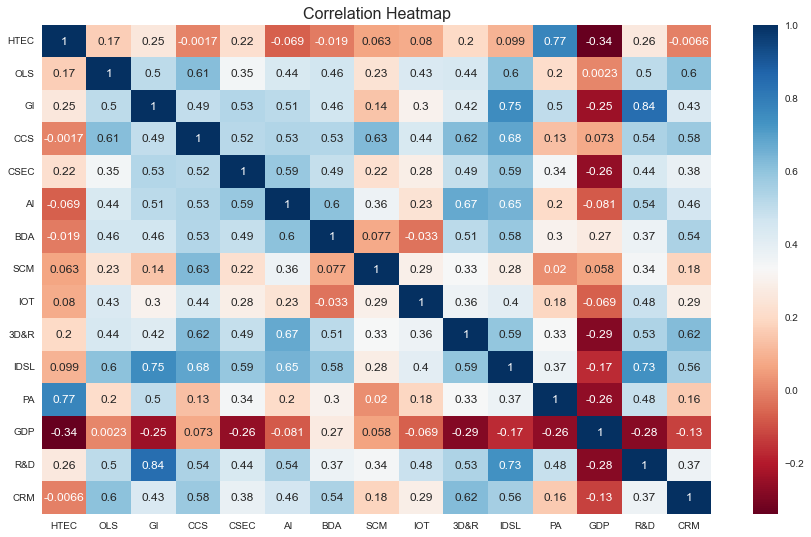

In [8]:
plt.figure(figsize=(15,9))
sns.heatmap(dfnum.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=16)
plt.yticks(rotation =0)
plt.show()

In [9]:
scaler = StandardScaler()
dfstd = scaler.fit_transform(dfnum)

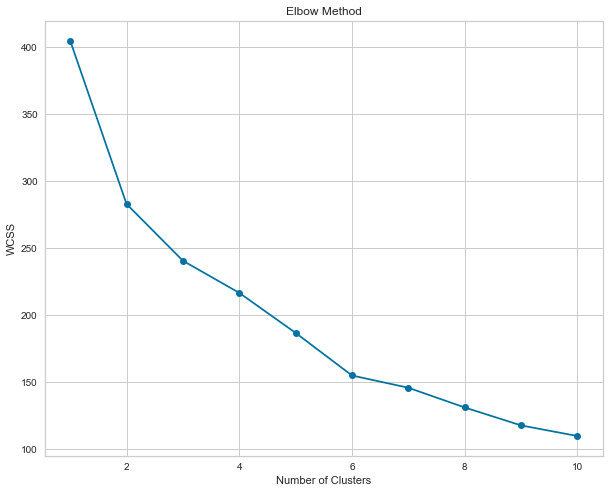

In [10]:
#Elbow method 

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfstd)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [11]:
for i in range(3,13):
    labels= KMeans(n_clusters=i,init="k-means++",random_state=0).fit(dfstd).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(silhouette_score(dfstd,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.14789183743508752
Silhouette score for k(clusters) = 4 is 0.15657152262147186
Silhouette score for k(clusters) = 5 is 0.1788819102528098
Silhouette score for k(clusters) = 6 is 0.16973436055625252
Silhouette score for k(clusters) = 7 is 0.14076928293510307
Silhouette score for k(clusters) = 8 is 0.08904793514758637
Silhouette score for k(clusters) = 9 is 0.07928093252487553
Silhouette score for k(clusters) = 10 is 0.11510424058317464
Silhouette score for k(clusters) = 11 is 0.1073242446798447
Silhouette score for k(clusters) = 12 is 0.12114721229040828


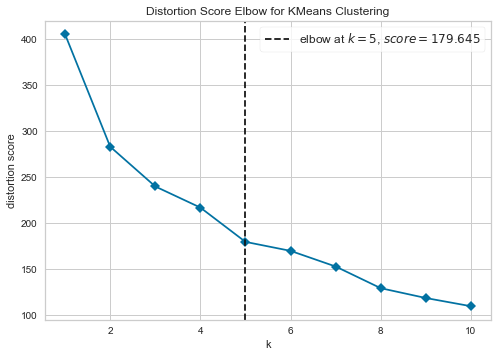

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(dfstd)
visualizer.show()

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [14]:
kmeans.fit(dfstd)

KMeans(n_clusters=5, random_state=42)

In [15]:
dfsegm = dfstd.copy()
dfsegm = pd.DataFrame(data = dfstd,columns = dfnum.columns)
dfsegm['Clusters'] = kmeans.labels_
dfsegm

,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM,Clusters
0,-0.520792,0.623412,1.689913,0.604929,0.527050,0.353394,1.304935,-0.216810,0.027642,0.736788,0.419304,-0.007503,0.059375,1.879453,1.096689,1
1,-0.552858,-2.903317,-1.288328,-1.770792,-0.865049,-0.982436,-0.863265,-0.887099,-1.358400,-0.833734,-2.225063,-0.458789,-0.784371,-1.033884,-1.253359,2
2,0.969199,0.302800,0.174522,0.070392,0.527050,-0.791603,-0.456727,-0.797727,0.347498,0.736788,0.501940,-0.429382,-1.164057,0.228931,-1.096689,3
3,-0.418716,0.944023,0.990289,1.317646,0.991083,3.025056,1.575961,1.213141,-0.825307,2.307311,1.163032,-0.006734,-0.573435,1.380974,1.096689,1
4,3.618902,0.302800,1.247463,-0.048394,0.991083,0.544227,0.627373,-0.529611,0.880591,1.260296,1.163032,4.519582,-1.332806,1.502824,0.156670,4
5,-0.723875,-0.338423,-0.453204,0.901894,-0.710371,-0.982436,-0.592240,1.436570,-1.145163,-1.357242,0.501940,-0.457828,0.945308,0.007385,-0.626680,0
6,-0.493002,1.424941,0.423400,0.961287,0.372372,-0.028272,1.304935,-0.484925,0.667354,-1.357242,-0.241788,-0.282349,3.139047,-0.612945,0.000000,0
7,-0.509569,-1.300259,-0.157316,-1.236255,-2.566503,-0.791603,-0.050190,-0.931785,-0.612070,-1.357242,-0.407061,-0.442644,0.945308,-0.313858,-0.470010,2
8,0.574789,0.142494,0.456584,-0.701718,0.217694,-0.028272,-0.863265,0.140678,-0.078977,0.213281,0.088758,-0.124553,-0.404686,-0.413554,1.566699,3
9,0.678469,0.142494,0.943279,-0.820504,0.527050,-0.219105,1.033910,-0.306181,-0.612070,-0.310227,0.088758,1.559698,0.396873,0.627715,-0.313340,3


In [16]:
pca = PCA()

In [17]:
pca.fit(dfstd)

PCA()

In [18]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.4332184 , 0.13821975, 0.08783364, 0.06816856, 0.06187618,
       0.05578921, 0.03957585, 0.03452945, 0.02481502, 0.01713731,
       0.01386076, 0.00914549, 0.00775481, 0.00410674, 0.00396883])

Text(0, 0.5, 'Cumulative Explained Variance')

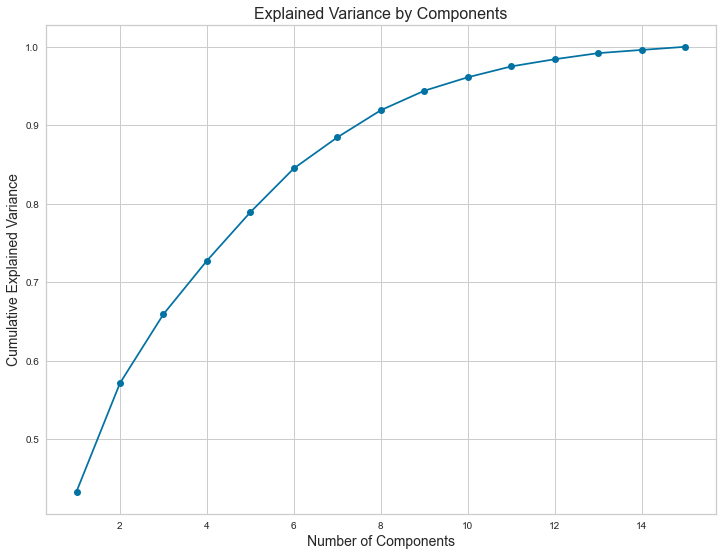

In [19]:
plt.figure(figsize = (12,9))
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

In [20]:
pca = PCA(n_components = 2)
pcadf = pca.fit_transform(dfstd)

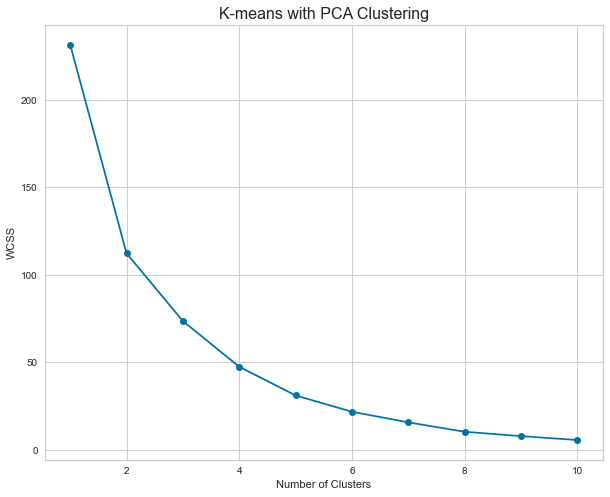

In [21]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(pcadf)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

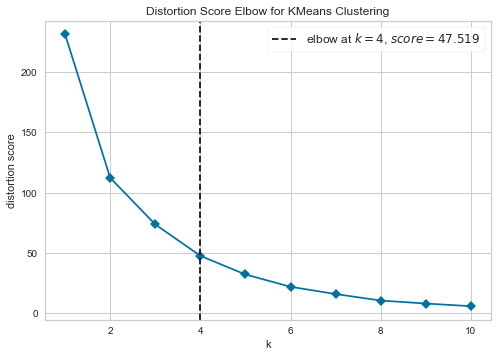

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(pcadf)
visualizer.show()

In [23]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)              

In [24]:
kmeans_pca.fit(pcadf)

KMeans(n_clusters=5, random_state=42)

In [25]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(pcadf)], axis = 1)
df_segm_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans

,Countries,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM,Component 1,Component 2,Segment K-means PCA
0,Belgium,508,7.6,90.33,53,94,10,22,25,28,6,61,2400,6.2,3.48,26,-2.641256,-0.438556,1
1,Bulgaria,448,5.4,79.56,13,85,3,6,10,15,3,29,52,4.2,0.85,11,4.682326,0.904346,2
2,Czechia,3296,7.4,84.85,44,94,4,9,12,31,6,62,205,3.3,1.99,12,-0.169572,1.399744,0
3,Denmark,699,7.8,87.80,65,97,24,24,57,20,9,70,2404,4.7,3.03,26,-4.433651,-1.282358,1
4,Germany,8254,7.4,88.73,42,97,11,17,18,36,7,70,25954,2.9,3.14,20,-3.747368,5.099423,4
5,Estonia,128,7.0,82.58,58,86,3,8,62,17,2,62,57,8.3,1.79,15,1.213962,-1.206043,3
6,Ireland,560,8.1,85.75,59,93,8,22,19,34,2,53,970,13.5,1.23,19,-0.261458,-2.308208,3
7,Greece,529,6.4,83.65,22,74,4,12,9,22,2,51,136,8.3,1.50,16,3.009313,-0.278274,2
8,Spain,2558,7.3,85.87,31,92,8,6,33,27,5,57,1791,5.1,1.41,29,-0.250774,0.519231,0
9,France,2752,7.3,87.63,29,94,7,20,23,22,4,57,10554,7.0,2.35,17,-0.630084,1.377957,0


In [26]:
df_segm_pca_kmeans['Labels'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'Cluster 3',
                                                          1:'Cluster 1',
                                                          2:'Cluster 2', 
                                                          3:'Cluster 5',
                                                          4:'Cluster 4',                    
                                                                        })

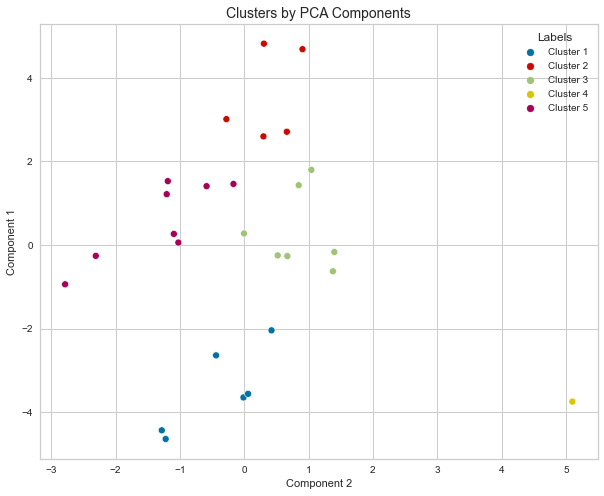

In [27]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Labels'], palette = ['b', 'r', 'g', 'y','m'])
plt.title('Clusters by PCA Components',fontsize=14)
plt.show()
#Final clusters

In [28]:
Cluster1 = df.loc[df_segm_pca_kmeans['Segment K-means PCA'] == 0]
Cluster1

,Countries,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
2,Czechia,3296,7.4,84.85,44,94,4,9,12,31,6,62,205,3.3,1.99,12
8,Spain,2558,7.3,85.87,31,92,8,6,33,27,5,57,1791,5.1,1.41,29
9,France,2752,7.3,87.63,29,94,7,20,23,22,4,57,10554,7.0,2.35,17
11,Italy,5132,7.1,82.92,60,93,6,7,95,32,5,42,4600,6.6,1.53,17
20,Poland,4301,7.8,80.02,29,87,3,8,13,19,3,44,483,5.2,1.39,21
21,Portugal,472,6.7,85.22,35,98,17,10,17,23,4,52,249,4.9,1.62,15
24,Slovakia,1862,7.1,82.71,36,90,5,5,16,27,4,54,55,3.0,0.91,16


In [29]:
Cluster2 = df.loc[df_segm_pca_kmeans['Segment K-means PCA'] == 1]
Cluster2

,Countries,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
0,Belgium,508,7.6,90.33,53,94,10,22,25,28,6,61,2400,6.2,3.48,26
3,Denmark,699,7.8,87.80,65,97,24,24,57,20,9,70,2404,4.7,3.03,26
18,Netherlands,2017,7.7,90.91,65,97,13,26,25,21,6,79,6375,5.0,2.29,27
19,Austria,687,8.0,88.61,40,91,9,7,22,51,5,66,2303,4.5,3.20,24
25,Finland,589,8.1,87.68,75,97,16,19,83,40,7,76,1895,3.5,2.94,28
26,Sweden,1457,7.8,89.44,75,95,10,13,45,40,6,72,4423,4.8,3.53,23


In [30]:
Cluster3 = df.loc[df_segm_pca_kmeans['Segment K-means PCA'] == 2]
Cluster3

,Countries,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
1,Bulgaria,448,5.4,79.56,13,85,3,6,10,15,3,29,52,4.2,0.85,11
7,Greece,529,6.4,83.65,22,74,4,12,9,22,2,51,136,8.3,1.50,16
13,Latvia,196,6.7,80.19,29,98,4,7,15,28,2,43,27,4.5,0.71,12
16,Hungary,1499,6.5,83.83,26,86,3,6,13,22,3,49,107,7.1,1.61,8
22,Romania,964,7.3,79.44,14,73,1,4,17,11,2,31,54,5.9,0.47,11


In [31]:
Cluster4 = df.loc[df_segm_pca_kmeans['Segment K-means PCA'] == 3]
Cluster4

,Countries,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
5,Estonia,128,7.0,82.58,58,86,3,8,62,17,2,62,57,8.3,1.79,15
6,Ireland,560,8.1,85.75,59,93,8,22,19,34,2,53,970,13.5,1.23,19
10,Croatia,541,6.3,81.49,39,90,9,13,43,23,5,53,22,10.2,1.25,10
12,Cyprus,0,7.1,81.64,50,83,3,3,13,33,6,45,64,5.5,0.82,25
14,Lithuania,165,6.4,81.83,34,93,4,9,27,28,3,56,50,5.0,1.16,22
15,Luxembourg,12,7.6,82.98,33,93,13,17,14,22,4,65,394,6.9,1.13,19
17,Malta,35,7.5,78.03,57,92,10,29,22,28,8,56,65,9.4,0.67,31
23,Slovenia,366,7.3,80.22,43,84,12,5,58,49,5,55,165,8.1,2.15,13


In [32]:
Cluster5 = df.loc[df_segm_pca_kmeans['Segment K-means PCA'] == 4]
Cluster5

,Countries,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
4,Germany,8254,7.4,88.73,42,97,11,17,18,36,7,70,25954,2.9,3.14,20


In [33]:
c = Cluster4.mean().to_frame()
c = c[0].astype('int')
c = c.to_frame()

c

,0
HTEC,225
OLS,7
GI,81
CCS,46
CSEC,89
AI,7
BDA,13
SCM,32
IOT,29
3D&R,4


In [34]:

for row in c.index:
    print(row, end = " ")

HTEC OLS GI CCS CSEC AI BDA SCM IOT 3D&R IDSL PA GDP R&D CRM 

In [35]:
c.insert(0, "values", ["HTEC", "OLS", "GI", "CCS", "CSEC", "AI", "BDA", "SCM", "IOT", "3D&R", "IDSL", "PA", "GDP", "R&D", "CRM"], True)
c.rename(columns = {0:'numbers'}, inplace = True)
c

,values,numbers
HTEC,HTEC,225
OLS,OLS,7
GI,GI,81
CCS,CCS,46
CSEC,CSEC,89
AI,AI,7
BDA,BDA,13
SCM,SCM,32
IOT,IOT,29
3D&R,3D&R,4


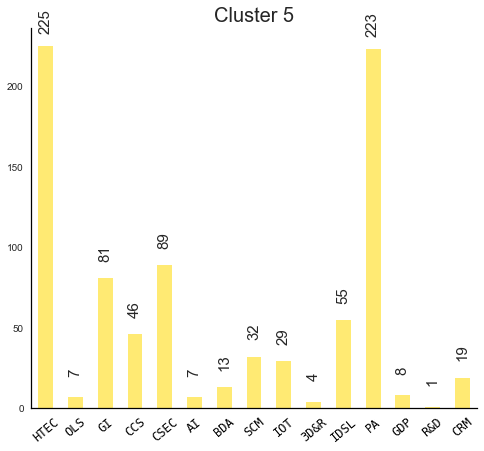

In [36]:


plots = c.plot.bar(figsize=(8, 7), grid= 0, color="#FFEA73")
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), 'g'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 25), rotation=90,
                   textcoords='offset points')
plots.spines['top'].set_visible(False)
plots.spines['right'].set_visible(False)
plots.spines['bottom'].set_color('black')
plots.spines['left'].set_color('black')


plt.xticks(rotation=40, horizontalalignment="center", color="black", family = 'monospace', fontsize = "12")

plots.get_legend().remove()
 
# Setting the title for the graph
plt.title("Cluster 5", fontsize="20")
 
# Finally showing the plot
plt.show()

In [37]:
a = df_segm_pca_kmeans[['Countries', 'CRM']].copy()
a

,Countries,CRM
0,Belgium,26
1,Bulgaria,11
2,Czechia,12
3,Denmark,26
4,Germany,20
5,Estonia,15
6,Ireland,19
7,Greece,16
8,Spain,29
9,France,17


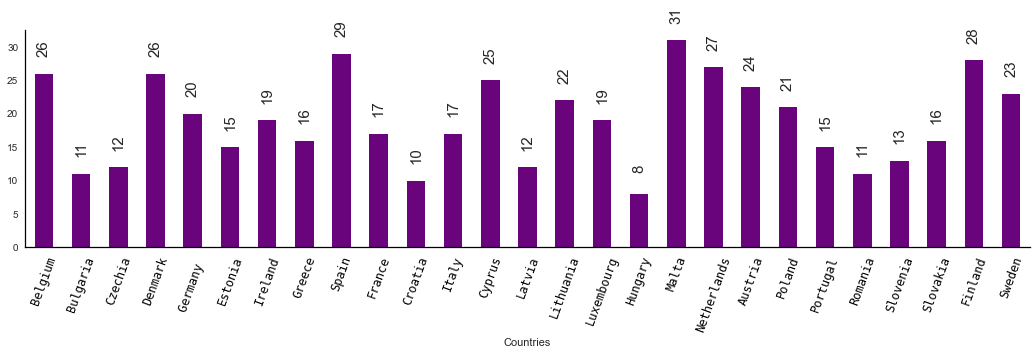

In [38]:
plots = a.plot.bar(x='Countries', figsize=(18, 4), grid= 0, color=np.random.rand(3,))
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), 'g'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 25), rotation=90,
                   textcoords='offset points')
plots.spines['top'].set_visible(False)
plots.spines['right'].set_visible(False)
plots.spines['bottom'].set_color('black')
plots.spines['left'].set_color('black')


plt.xticks(rotation=70, horizontalalignment="center", color="black", family = 'monospace', fontsize = "12")

plots.get_legend().remove()
 
# Setting the title for the graph

 
# Finally showing the plot
plt.show()

In [48]:
z = Cluster1.mean().to_frame()
z = z[0].astype('i')
z = z.to_frame().T

z.insert(0, "clusters", ["Cluster3"], True)

z


,clusters,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
0,Cluster3,2910,7,84,37,92,7,9,29,25,4,52,2562,5,1,18


In [50]:
y = Cluster2.mean().to_frame()
y = y[0].astype('i')
y = y.to_frame().T

y.insert(0, "clusters", ["Cluster1"], True)

y

,clusters,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
0,Cluster1,992,7,89,62,95,13,18,42,33,6,70,3300,4,3,25


In [51]:
x = Cluster3.mean().to_frame()
x = x[0].astype('i')
x = x.to_frame().T

x.insert(0, "clusters", ["Cluster2"], True)

x

,clusters,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
0,Cluster2,727,6,81,20,83,3,7,12,19,2,40,75,6,1,11


In [52]:
n = Cluster4.mean().to_frame()
n = n[0].astype('i')
n = n.to_frame().T

n.insert(0, "clusters", ["Cluster5"], True)

n

,clusters,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
0,Cluster5,225,7,81,46,89,7,13,32,29,4,55,223,8,1,19


In [55]:
m = Cluster5.mean().to_frame()
m = m[0].astype('i')
m = m.to_frame().T

m.insert(0, "clusters", ["Cluster4"], True)

m

,clusters,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
0,Cluster4,8254,7,88,42,97,11,17,18,36,7,70,25954,2,3,20


In [57]:
frames = [y, x, z, m, n]
result = pd.concat(frames)

result

,clusters,HTEC,OLS,GI,CCS,CSEC,AI,BDA,SCM,IOT,3D&R,IDSL,PA,GDP,R&D,CRM
0,Cluster1,992,7,89,62,95,13,18,42,33,6,70,3300,4,3,25
0,Cluster2,727,6,81,20,83,3,7,12,19,2,40,75,6,1,11
0,Cluster3,2910,7,84,37,92,7,9,29,25,4,52,2562,5,1,18
0,Cluster4,8254,7,88,42,97,11,17,18,36,7,70,25954,2,3,20
0,Cluster5,225,7,81,46,89,7,13,32,29,4,55,223,8,1,19


In [144]:
b = result[['clusters', 'CRM']].copy()
b

,clusters,CRM
0,Cluster1,25
0,Cluster2,11
0,Cluster3,18
0,Cluster4,20
0,Cluster5,19


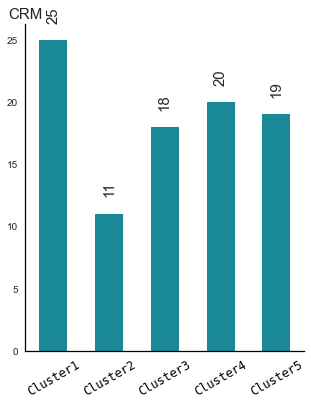

In [145]:
plots = b.plot.bar(x='clusters', figsize=(5, 6), grid= 0, color=np.random.rand(3,))
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), 'g'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 25), rotation=90,
                   textcoords='offset points')
plots.spines['top'].set_visible(False)
plots.spines['right'].set_visible(False)
plots.spines['bottom'].set_color('black')
plots.spines['left'].set_color('black')


plt.xticks(rotation=30, horizontalalignment="center", color="black", family = 'monospace', fontsize = "12")

plots.get_legend().remove()
 
# Setting the title for the graph
plt.title("CRM", fontsize="15", position=(0,1,0))
plt.xlabel("")
# Finally showing the plot
plt.show()